In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.autograd.gradcheck import zero_gradients

from sklearn.decomposition import PCA

In [2]:
path = "F:\JupyterNotebook_Dir\REAM _Lab\CCPP\CCPP\Folds5x2_pp.xlsx"
data = pd.read_excel(path)



data_AT = data["AT"].values;data_V = data["V"].values
data_AP = data["AP"].values;data_RH = data["RH"];data_PE = data["PE"].values
data=np.vstack((data_AT,data_V,data_AP,data_RH))
data=data.T

#data pre-processing
scaler = StandardScaler()
data_standard = scaler.fit_transform(data)

#data_PE=data_PE.T
X_train, X_test, y_train, y_test = train_test_split(data_standard, data_PE, test_size=0.33)

# Effect of individual feature

Text(15, 420, 'y=-2.171x497.034')

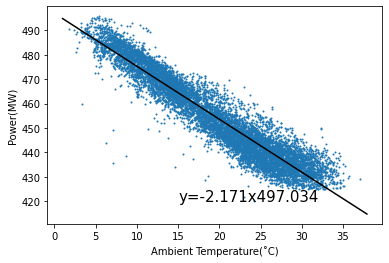

In [3]:
plt.scatter(data_AT,data_PE,s=1) ;
plt.xlabel("Ambient Temperature(˚C)");
plt.ylabel("Power(MW)");

z1 = np.polyfit(data_AT,data_PE,1)  #Linear fitting
x1 = np.arange(1, 38, 0.1)
y1 = x1 * z1[0]+z1[1]
plt.plot(x1, y1,'black')
plt.text(15,420,'y=%.3fx%.3f'%(z1[0],z1[1]),fontsize=15)

Text(50, 420, 'y=-1.168x517.802')

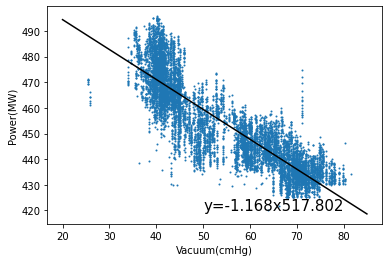

In [4]:
plt.scatter(data_V,data_PE,s=1) ;
plt.xlabel("Vacuum(cmHg)");
plt.ylabel("Power(MW)");

z2 = np.polyfit(data_V,data_PE,1)  #Linear fitting
x2 = np.arange(20, 85, 0.1)
y2 = x2 * z2[0]+z2[1]
plt.plot(x2, y2,'black')
plt.text(50,420,'y=%.3fx%.3f'%(z2[0],z2[1]),fontsize=15)

Text(1010, 420, 'y=1.490x-1055.261')

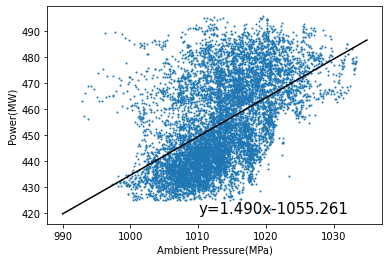

In [5]:
plt.scatter(data_AP,data_PE,s=1) ;
plt.xlabel("Ambient Pressure(MPa)");
plt.ylabel("Power(MW)");

z3 = np.polyfit(data_AP,data_PE,1)  #Linear fitting
x3 = np.arange(990, 1035, 0.1)
y3 = x3 * z3[0]+z3[1]
plt.plot(x3, y3,'black')
plt.text(1010,420,'y=%.3fx%.3f'%(z3[0],z3[1]),fontsize=15)

Text(60, 420, 'y=0.456x+420.962')

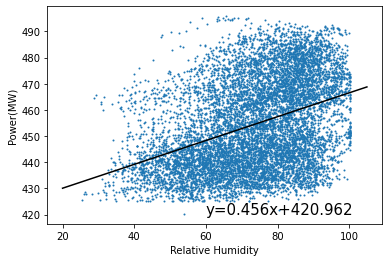

In [6]:
plt.scatter(data_RH,data_PE,s=1) ;
plt.xlabel("Relative Humidity");
plt.ylabel("Power(MW)");

z4 = np.polyfit(data_RH,data_PE,1)  #Linear fitting
x4 = np.arange(20, 105, 0.1)
y4 = x4 * z4[0]+z4[1]
plt.plot(x4, y4,'black')
plt.text(60,420,'y=%.3fx+%.3f'%(z4[0],z4[1]),fontsize=15)

# Support Vector Regression

In [7]:
# SVR regression
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
predict=svr_rbf.fit(X_train, y_train).predict(X_test)

In [8]:
r=r2_score(y_test,predict)
print(r)
MSE = mean_squared_error(y_test,predict)
print(MSE)
MAPE = mean_absolute_percentage_error(y_test,predict)
print(MAPE)

0.9388525874013733
17.46390090063222
0.006960286211302102


Text(0.5, 1.0, 'Support Vector Regression')

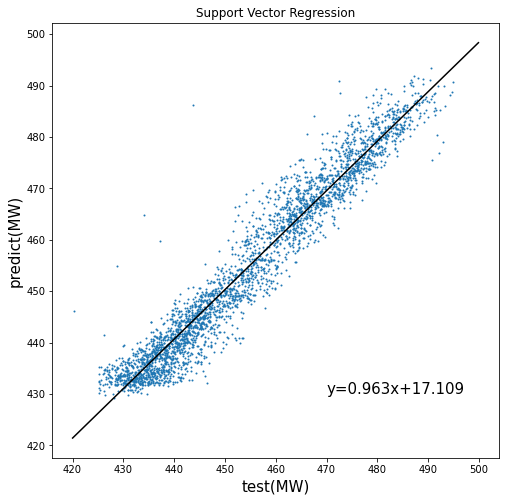

In [9]:
n=len(predict)

t = np.linspace(1,n,n)
plt.figure(figsize=(8,8))
plt.xlabel('test(MW)',fontsize=15)
plt.ylabel('predict(MW)',fontsize=15)
plt.scatter(y_test,predict,s=1)
z5 = np.polyfit(y_test,predict,1)  #Linear fitting
x5 = np.arange(420, 500, 0.1)
y5 = x5 * z5[0]+z5[1]
plt.plot(x5, y5,'black')
plt.text(470,430,'y=%.3fx+%.3f'%(z5[0],z5[1]),fontsize=15)
plt.title('Support Vector Regression')

# Neural Network

In [10]:
x_ts=torch.from_numpy(X_train)
y_ts=torch.from_numpy(y_train)
x_test_ts=torch.from_numpy(X_test)
y_test_ts=torch.from_numpy(y_test)
y_ts=y_ts.reshape(6410,1)
y_test_ts = y_test_ts.reshape(3158,1)
x=Variable(x_ts)

In [11]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        self.linear1 = torch.nn.Linear(4,8) 
        self.linear2 = torch.nn.Linear(8,6)
        self.predict = torch.nn.Linear(6,1)
        
    def forward(self, x):
        out = self.linear1(x)
        out = F.relu(out)
        out = self.linear2(out)
        out = F.relu(out)
        out =self.predict(out)
        return out
    
model = Model().double()
model_pca = Model().double()

model

Model(
  (linear1): Linear(in_features=4, out_features=8, bias=True)
  (linear2): Linear(in_features=8, out_features=6, bias=True)
  (predict): Linear(in_features=6, out_features=1, bias=True)
)

In [12]:
optimizer = torch.optim.SGD(model.parameters(),lr = 1e-5)
loss_func = torch.nn.MSELoss()

h_list = []
l_list = []
for epoch in range(1000):
    # forward
    y_pred = model(x)
    loss = loss_func(y_pred,y_ts)
   # print(epoch, loss.item())
    h_list.append(epoch)
    l_list.append(loss.item())
    
    # back propagation
    optimizer.zero_grad()
    loss.backward()
    
    # updating parameters
    optimizer.step()

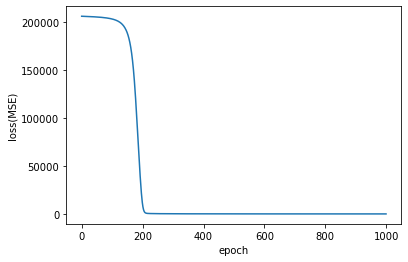

In [13]:
plt.plot(h_list, l_list)
plt.ylabel('loss(MSE)')
plt.xlabel('epoch')
plt.show()

r2_score is 0.8783866916511552
MSE is 34.733158361797216


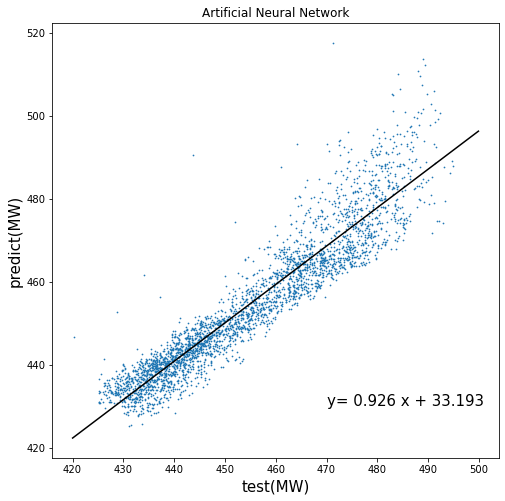

In [14]:
y_test_model=model(x_test_ts)
y_predict=y_test_model.detach().numpy()
plt.figure(figsize=(8,8))
plt.xlabel('test(MW)',fontsize=15)
plt.ylabel('predict(MW)',fontsize=15)
plt.scatter(y_test,y_predict,s=0.5)

z5 = np.polyfit(y_test,y_predict,1)  #Linear fitting
x5 = np.arange(420, 500, 0.1)
y5 = x5 * z5[0]+z5[1]
plt.plot(x5, y5,'black')
z6 = np.polyfit(y_test,y_predict,1)  #Linear fitting
plt.text(470,430,'y= %.3f x + %.3f'%(z6[0],z6[1]),fontsize=15)
plt.title('Artificial Neural Network')
r_ANN=r2_score(y_test,y_predict)
print('r2_score is %s'%r_ANN)
MSE_ANN = mean_squared_error(y_test,y_predict)
print('MSE is %s'%MSE_ANN)

# Fast Gradient Sign Method (FGSM)

In [15]:
def FGSM_attack(x_test_ts, y_test_ts, level):
    x_test_ts = Variable(x_test_ts,requires_grad=True)
    zero_gradients(x_test_ts)
    y_test_model=model(x_test_ts)
    loss = loss_func(y_test_ts,y_test_model)
    loss.backward()
    normed_grad = level * torch.sign(x_test_ts.grad.data)
    x_adv_ts = x_test_ts.data + normed_grad
    y_adv_ts = model(x_adv_ts)
    return x_adv_ts, y_adv_ts
    


In [16]:
levels = [0.001, 0.05,0.1,0.15,0.2,0.25]

#y_ts=y_ts.reshape(3158,1)

train_scores = []
test_scores = []


for level in levels:
    x_adv_ts, y_adv_ts = FGSM_attack(x_test_ts,y_test_ts,level)
    y_p1 = y_adv_ts.detach().numpy()    
    r=r2_score(y_test,y_p1)
    train_scores.append(r)
    
    x_adv_tr, y_adv_tr = FGSM_attack(x_ts,y_ts,level)
    y_p2 = y_adv_tr.detach().numpy()    
    r=r2_score(y_train,y_p2)
    test_scores.append(r)
    

Text(0.5, 1.0, 'Attack on ANN')

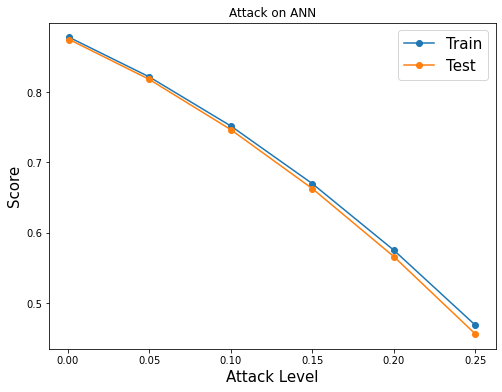

In [17]:
plt.figure(figsize=(8,6))
plt.plot(levels, train_scores, label="Train",marker='o');
plt.plot(levels, test_scores, label="Test",marker='o');
plt.xlabel("Attack Level",fontsize=15);
plt.ylabel("Score",fontsize=15);
plt.legend(prop={'size': 15})
plt.title("Attack on ANN")


# PCA Defense

In [18]:
class Model_pca(torch.nn.Module):
    def __init__(self):
        super(Model_pca,self).__init__()
        self.linear1 = torch.nn.Linear(3,12) 
        self.linear2 = torch.nn.Linear(12,8)
        self.predict = torch.nn.Linear(8,1)
        
    def forward(self, x):
        out = self.linear1(x)
        out = F.relu(out)
        out = self.linear2(out)
        out = F.relu(out)
        out =self.predict(out)
        return out
    

model_pca = Model_pca().double()
model_pca_svr = Model_pca().double()

model_pca_svr

Model_pca(
  (linear1): Linear(in_features=3, out_features=12, bias=True)
  (linear2): Linear(in_features=12, out_features=8, bias=True)
  (predict): Linear(in_features=8, out_features=1, bias=True)
)

In [19]:
def train_model_pca(x_train,model):
    pca = PCA(n_components=3)

    pca.fit(X_train)
    x_tr_pca = pca.fit_transform(X_train)
    x_tr_pca=torch.from_numpy(x_tr_pca)
    
    optimizer = torch.optim.SGD(model.parameters(),lr = 1e-5)
    loss_func = torch.nn.MSELoss()

    h_list = []
    l_list = []
    for epoch in range(9000):
        # forward
        y_pred = model_pca(x_tr_pca)
        loss = loss_func(y_pred,y_ts)
       # print(epoch, loss.item())
        h_list.append(epoch)
        l_list.append(loss.item())
    
        # back propagation
        optimizer.zero_grad()
        loss.backward()
    
        # updating parameters
        optimizer.step()
    return h_list,l_list,model,x_tr_pca
    
[h_list_pca,l_list_pca,model_pca,x_tr_pca]=train_model_pca(X_train,model_pca)

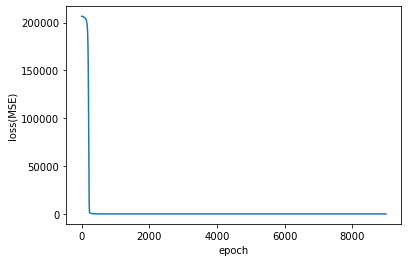

In [20]:
plt.plot(h_list_pca, l_list_pca)
plt.ylabel('loss(MSE)')
plt.xlabel('epoch')
plt.show()

0.9141066198528309
MSE is 24.53143011555947


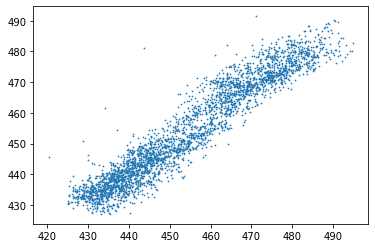

In [21]:
pca = PCA(n_components=3)
pca.fit(X_test)
x_te_pca = pca.fit_transform(X_test)
x_te_pca=torch.from_numpy(x_te_pca)
y_test_model=model_pca(x_te_pca)
y_predict=y_test_model.detach().numpy()
plt.scatter(y_test,y_predict,s=0.5)
r=r2_score(y_test,y_predict)
print(r)
MSE_ANN = mean_squared_error(y_test,y_predict)
print('MSE is %s'%MSE_ANN)

In [22]:

train_scores_pca = []
test_scores_pca = []


for level in levels:
    x_adv_ts, y_adv_ts = FGSM_attack(x_test_ts,y_test_ts,level)
    pca.fit(x_adv_ts)
    x_te_pca = pca.fit_transform(x_adv_ts)
    x_te_pca=torch.from_numpy(x_te_pca)
    y_p1 = model_pca(x_te_pca)
    y_p1 = y_p1.detach().numpy()    
    r=r2_score(y_test,y_p1)
    test_scores_pca.append(r)
    
    x_adv_tr, y_adv_tr = FGSM_attack(x_ts,y_ts,level)
    pca.fit(x_adv_tr)
    x_tr_pca = pca.fit_transform(x_adv_tr)
    x_tr_pca=torch.from_numpy(x_tr_pca)
    y_p2 = model_pca(x_tr_pca)
    y_p2 = y_p2.detach().numpy()    
    r=r2_score(y_train,y_p2)
    train_scores_pca.append(r)
    
print(x_ts)
print(x_adv_tr)

tensor([[-0.8885, -1.1636,  0.5761,  0.6700],
        [-0.2216, -0.1752, -1.7158,  1.8344],
        [-1.1354, -1.0754,  1.2311,  0.7658],
        ...,
        [ 0.0079, -0.8559, -0.6195, -0.5205],
        [-0.8187, -0.8519,  0.4750, -0.4150],
        [-1.7285, -1.0644,  1.9535,  1.5940]], dtype=torch.float64)
tensor([[-0.6385, -0.9136,  0.3261,  0.4200],
        [ 0.0284,  0.0748, -1.9658,  1.5844],
        [-0.8854, -0.8254,  0.9811,  0.5158],
        ...,
        [ 0.2579, -0.6059, -0.8695, -0.7705],
        [-0.5687, -0.6019,  0.2250, -0.1650],
        [-1.9785, -1.3144,  1.7035,  1.8440]], dtype=torch.float64)


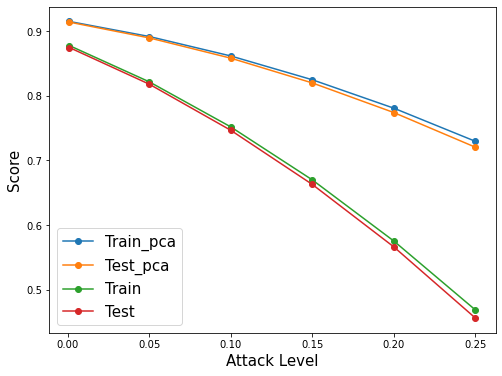

In [23]:
plt.figure(figsize=(8,6))
plt.plot(levels, train_scores_pca, label="Train_pca",marker='o');
plt.plot(levels, test_scores_pca, label="Test_pca",marker='o');
plt.plot(levels, train_scores, label="Train",marker='o');
plt.plot(levels, test_scores, label="Test",marker='o');
plt.xlabel("Attack Level",fontsize=15);
plt.ylabel("Score",fontsize=15);
plt.legend(prop={'size': 15})

In [24]:
print(test_scores_pca)
print(train_scores_pca)

[0.9136766786921152, 0.8893025034874149, 0.8579750694989382, 0.8196789837606925, 0.7739001773469637, 0.720355069014451]
[0.9147389677131006, 0.8914717791269894, 0.8613690005116262, 0.8245854627661123, 0.7806709424078657, 0.729464767521832]


# Attack on SVR

In [25]:
print(predict)
pre_svr = torch.tensor(predict)
pre_svr = Variable(pre_svr).reshape(3158,1)
yTr_svr = torch.tensor(y_train).reshape(6410,1)
yTr_svr = Variable(yTr_svr)

[473.95703579 460.03539676 443.57092715 ... 431.4814271  439.28708606
 486.89444584]


In [26]:
#Implement FGSM attack
levels = [0.001, 0.05,0.1,0.15,0.2,0.25]

#y_ts=y_ts.reshape(3158,1)

train_scores_svr = []
test_scores_svr = []


for level in levels:
    x_adv_ts, y_adv_ts = FGSM_attack(x_test_ts,pre_svr,level)
    y_p1 = y_adv_ts.detach().numpy()    
    r=r2_score(y_test,y_p1)
    train_scores_svr.append(r)
    
    x_adv_tr, y_adv_tr = FGSM_attack(x_ts,yTr_svr,level)
    y_p2 = y_adv_tr.detach().numpy()    
    r=r2_score(y_train,y_p2)
    test_scores_svr.append(r)

Text(0.5, 1.0, 'FGSM attack on SVR')

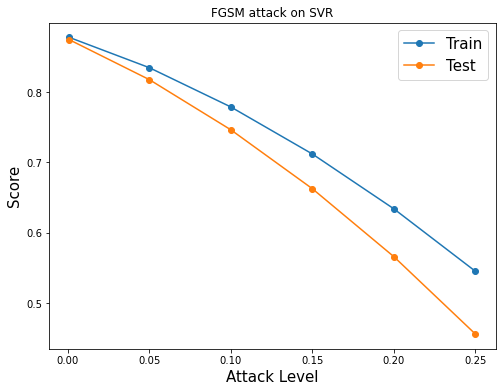

In [27]:
plt.figure(figsize=(8,6))
plt.plot(levels, train_scores_svr, label="Train",marker='o');
plt.plot(levels, test_scores_svr, label="Test",marker='o');
plt.xlabel("Attack Level",fontsize=15);
plt.ylabel("Score",fontsize=15);
plt.legend(prop={'size': 15})
plt.title("FGSM attack on SVR")

In [28]:
train_scores_pca_svr = []
test_scores_pca_svr = []


for level in levels:
    x_adv_ts, y_adv_ts = FGSM_attack(x_test_ts,pre_svr,level)# Note the same attack method with input data from SVR
    pca.fit(x_adv_ts)
    x_te_pca = pca.fit_transform(x_adv_ts)
    x_te_pca=torch.from_numpy(x_te_pca)
    y_p1 = model_pca(x_te_pca) # same PCA model as in the attack on ANN
    y_p1 = y_p1.detach().numpy()    
    r=r2_score(y_test,y_p1)
    test_scores_pca_svr.append(r)
    
    x_adv_tr, y_adv_tr = FGSM_attack(x_ts,yTr_svr,level)
    pca.fit(x_adv_tr)
    x_tr_pca = pca.fit_transform(x_adv_tr)
    x_tr_pca=torch.from_numpy(x_tr_pca)
    y_p2 = model_pca(x_tr_pca)
    y_p2 = y_p2.detach().numpy()    
    r=r2_score(y_train,y_p2)
    train_scores_pca_svr.append(r)
    
print(x_ts)
print(x_adv_tr)

tensor([[-0.8885, -1.1636,  0.5761,  0.6700],
        [-0.2216, -0.1752, -1.7158,  1.8344],
        [-1.1354, -1.0754,  1.2311,  0.7658],
        ...,
        [ 0.0079, -0.8559, -0.6195, -0.5205],
        [-0.8187, -0.8519,  0.4750, -0.4150],
        [-1.7285, -1.0644,  1.9535,  1.5940]], dtype=torch.float64)
tensor([[-0.6385, -0.9136,  0.3261,  0.4200],
        [ 0.0284,  0.0748, -1.9658,  1.5844],
        [-0.8854, -0.8254,  0.9811,  0.5158],
        ...,
        [ 0.2579, -0.6059, -0.8695, -0.7705],
        [-0.5687, -0.6019,  0.2250, -0.1650],
        [-1.9785, -1.3144,  1.7035,  1.8440]], dtype=torch.float64)


Text(0.5, 1.0, 'FGSM attack on SVR')

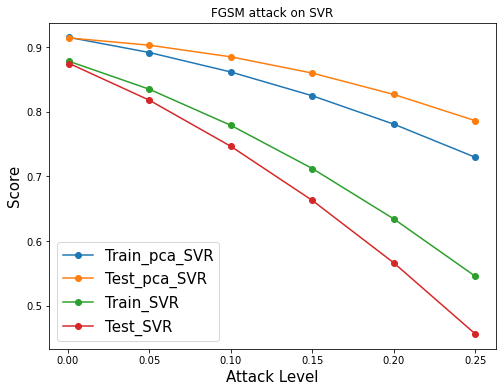

In [29]:
plt.figure(figsize=(8,6))
plt.plot(levels, train_scores_pca_svr, label="Train_pca_SVR",marker='o');
plt.plot(levels, test_scores_pca_svr, label="Test_pca_SVR",marker='o');
plt.plot(levels, train_scores_svr, label="Train_SVR",marker='o');
plt.plot(levels, test_scores_svr, label="Test_SVR",marker='o');
plt.xlabel("Attack Level",fontsize=15);
plt.ylabel("Score",fontsize=15);
plt.legend(prop={'size': 15})
plt.title("FGSM attack on SVR")